# Printable colors demo
In this notebook we construct a demo for the printable colors rule


In [6]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import Image as iImage

# hacky path usage to get vislint imported correctly
import sys
sys.path.append('../../lint_rules')
sys.path.append('../../')
from vislint import vislint

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

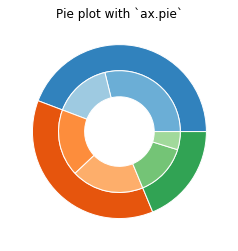

In [2]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.savefig('color-sunburst.png')
plt.show()


In [3]:
vislint(ax, fig, {"representation-invariance": 0.01})

[0.44, 0.47, 0.47, 0.62, 0.75, 0.65, 0.75, 0.64, 0.76]


[('require-axes', 'Axes must be labeled'),
 ('require-legend', 'A legend must be used'),
 ('no-pie', 'Pie charts are not allowed'),
 ('maximum-pie-pieces',
  'This pie chart has more than the allowed number of wedges'),
 ('no-radial', 'Radial charts are not allowed'),
 ('max-colors', 'Too many colors'),
 ('printable-colors', 'Colors must be printable')]

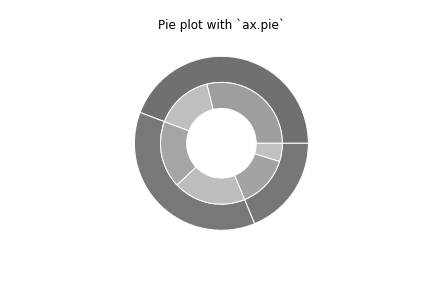

In [7]:
img = Image.open('color-sunburst.png').convert('LA')
img.save('greyscale-sunburst.png')
iImage("greyscale-sunburst.png")

In [19]:
cmap = plt.get_cmap("tab20b")
cmap(np.arange(0, 20))

array([[0.22352941, 0.23137255, 0.4745098 , 1.        ],
       [0.32156863, 0.32941176, 0.63921569, 1.        ],
       [0.41960784, 0.43137255, 0.81176471, 1.        ],
       [0.61176471, 0.61960784, 0.87058824, 1.        ],
       [0.38823529, 0.4745098 , 0.22352941, 1.        ],
       [0.54901961, 0.63529412, 0.32156863, 1.        ],
       [0.70980392, 0.81176471, 0.41960784, 1.        ],
       [0.80784314, 0.85882353, 0.61176471, 1.        ],
       [0.54901961, 0.42745098, 0.19215686, 1.        ],
       [0.74117647, 0.61960784, 0.22352941, 1.        ],
       [0.90588235, 0.72941176, 0.32156863, 1.        ],
       [0.90588235, 0.79607843, 0.58039216, 1.        ],
       [0.51764706, 0.23529412, 0.22352941, 1.        ],
       [0.67843137, 0.28627451, 0.29019608, 1.        ],
       [0.83921569, 0.38039216, 0.41960784, 1.        ],
       [0.90588235, 0.58823529, 0.61176471, 1.        ],
       [0.48235294, 0.25490196, 0.45098039, 1.        ],
       [0.64705882, 0.31764706,

In [14]:
np.arange(0, 20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

(-1.1204977495967983,
 1.1206737731001053,
 -1.100000003368699,
 1.1000000001604142)

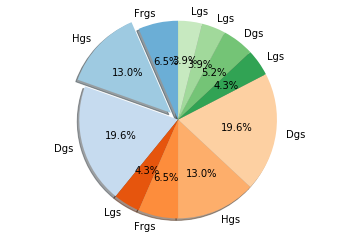

In [21]:
    labels = "Frgs", "Hgs", "Dgs", "Lgs", "Frgs", "Hgs", "Dgs", "Lgs", "Dgs", "Lgs", "Lgs"
    sizes = [15, 30, 45, 10, 15, 30, 45, 10, 12, 9, 9]
    explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. "Hogs")
    cmap = plt.get_cmap("tab20c")
    my_colors = cmap(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
            shadow=True, startangle=90, colors=my_colors)

    ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.